# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Dandi Septiandi
- **Email:** dandi.septiandi2001@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/dandi_septiandi/academies


## Menentukan Pertanyaan Bisnis


1. What pattern does the amount of PM2.5 concentration in the air recorded in an hour follow for a daily time period ?
2. In which month does the amount of PM2.5 contained in the air rises ?
3. At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?
4. In which direction does polluted air/wind mostly move ?
5. How do the other environmental factors affect the amount of PM2.5 concentration in the air ?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import joblib
from IPython.display import display

## Data Wrangling

### Gathering Data

In [3]:
# Load the CSV file
dataA = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")

# Show the first few rows of the dataframe
dataA.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight**

1. **Kualitas Udara**:
   - Konsentrasi **PM2.5** (partikel halus) dan **PM10** (partikel yang lebih besar) dalam udara relatif rendah pada waktu yang ditunjukkan, dengan nilai PM2.5 dan PM10 sekitar 3 hingga 4 µg/m³, yang mengindikasikan bahwa kualitas udara pada saat itu cukup baik.
   - Konsentrasi **SO2**, **NO2**, dan **CO** juga terbilang rendah, meskipun NO2 mencapai nilai yang lebih tinggi pada jam-jam tertentu, menunjukkan adanya aktivitas yang menghasilkan nitrogen dioksida (kemungkinan dari emisi kendaraan).

2. **Polusi Waktu Tertentu**:
   - Data menunjukkan per jam dari hari yang sama (1 Maret 2013). Konsentrasi polutan tetap rendah dan stabil sepanjang malam dan pagi awal (dari jam 00:00 hingga 04:00). Ini mungkin menunjukkan lebih sedikit aktivitas manusia pada malam hari, yang cenderung mengurangi emisi polutan.

3. **Faktor Lingkungan**:
   - **Temperatur (TEMP)** cukup dingin, berkisar antara -2°C hingga -0.7°C, dengan titik embun (**DEWP**) yang sangat rendah, yang berarti udara kering.
   - **Tekanan atmosfer (PRES)** tinggi, sekitar 1023 hingga 1025 hPa, yang umumnya terkait dengan kondisi cuaca stabil (kemungkinan cuaca cerah atau dingin).
   - **Kecepatan angin (WSPM)** bervariasi antara 2.0 hingga 5.6 m/s, yang menunjukkan adanya angin yang bisa mempengaruhi penyebaran polutan. **Arah angin (wd)** yang bervariasi antara utara (N) hingga barat laut (NNW) menunjukkan pola aliran angin yang bergerak di sekitar lokasi.

4. **Kondisi Curah Hujan (RAIN)**:
   - Tidak ada hujan yang tercatat pada jam-jam tersebut (nilai 0.0). Tanpa hujan, tidak ada proses pencucian atmosfer yang dapat mengurangi polutan secara signifikan.

5. **Lokasi Pengukuran**:
   - Semua pengukuran dilakukan di stasiun yang sama, yaitu **Guanyuan**, yang berarti analisis ini memberikan gambaran kualitas udara di satu lokasi spesifik pada rentang waktu tertentu.

### Assessing Data

In [4]:
# drop the unwanted columns/features
cols_to_drop = ['No','station']
data = dataA.drop(cols_to_drop,axis=1)
# print out the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34448 non-null  float64
 5   PM10    34635 non-null  float64
 6   SO2     34590 non-null  float64
 7   NO2     34405 non-null  float64
 8   CO      33311 non-null  float64
 9   O3      33891 non-null  float64
 10  TEMP    35044 non-null  float64
 11  PRES    35044 non-null  float64
 12  DEWP    35044 non-null  float64
 13  RAIN    35044 non-null  float64
 14  wd      34983 non-null  object 
 15  WSPM    35050 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 4.3+ MB


In [5]:
# check for duplicated values and null values
print('Are there any duplicated values in data? : {}\n'.format(data.duplicated().any()))
print('The total number of null values in each colum:')
display(data.isnull().sum())

Are there any duplicated values in data? : False

The total number of null values in each colum:


,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753
O3,1173


In [6]:
# find the most appearing wind direction value
data.wd.mode()

,wd
0,NE


### Cleaning Data

In [7]:
# fill in the missing values with the mean of the particular column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# replace the missing values for the wind direction with the modal value
data.wd.fillna(value='NE',inplace=True)

# let's check the data again if there are any missing values
data.isnull().any()

,0
year,False
month,False
day,False
hour,False
PM2.5,False
PM10,False
SO2,False
NO2,False
CO,False
O3,False


In [8]:
data.to_csv("all_data.csv", index=False)

Setelah dilakukan pembersihan data, semua nilai kosong berhasil diatasi:

- Proses cleansing telah mengisi atau menghapus nilai-nilai yang kosong, sehingga dataset tidak lagi memiliki nilai null.
- Semua kolom dalam dataset kini memiliki nilai yang valid (tidak ada nilai yang kosong)


## Exploratory Data Analysis (EDA)

### Explore PM2.5


EDA adalah proses sederhana yang menggambarkan data melalui visualisasi. Ini melibatkan mengajukan pertanyaan tentang data dan menjawabnya dengan bantuan grafik/diagram (representasi grafis dari data). Dalam proses ini, akan mencoba mempelajari perilaku jumlah polutan (**konsentrasi PM2.5**) di udara dan hubungan antara fitur-fitur lainnya.

Berikut adalah beberapa pertanyaan yang akan coba dijawab dengan menganalisis data untuk lebih memahami variabel dependen dan independen:

- Pola apa yang diikuti oleh jumlah konsentrasi PM2.5 yang dicatat setiap jam selama periode waktu harian?
- Pada bulan apa jumlah PM2.5 di udara meningkat?
- Pada jam berapa dalam sehari konsentrasi PM2.5 di udara tinggi?
- Ke arah mana udara/angin yang tercemar paling sering bergerak?
- Bagaimana faktor lingkungan lainnya mempengaruhi jumlah konsentrasi PM2.5 di udara?

Namun, karena akan menghitung rata-rata dari variabel dependen, maka perlu mengetahui distribusi data sebelum mengambil rata-rata tersebut.

In [9]:
# create a datetime column using the year,month,day and hour columns.
years = data['year'].values
months = data['month'].values
days = data['day'].values
hours = data['hour'].values
full_date = []

for i in range(data.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates,columns=['date'])
data = pd.concat([dates,data],axis=1)

data.head()

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2013-03-01 01:00:00,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
4,2013-03-01 04:00:00,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0


## Visualization & Explanatory Analysis

Disebabkan akan mengambil rata-rata variabel dependen, maka harus mengetahui distribusi data sebelum mengambil rata-rata.

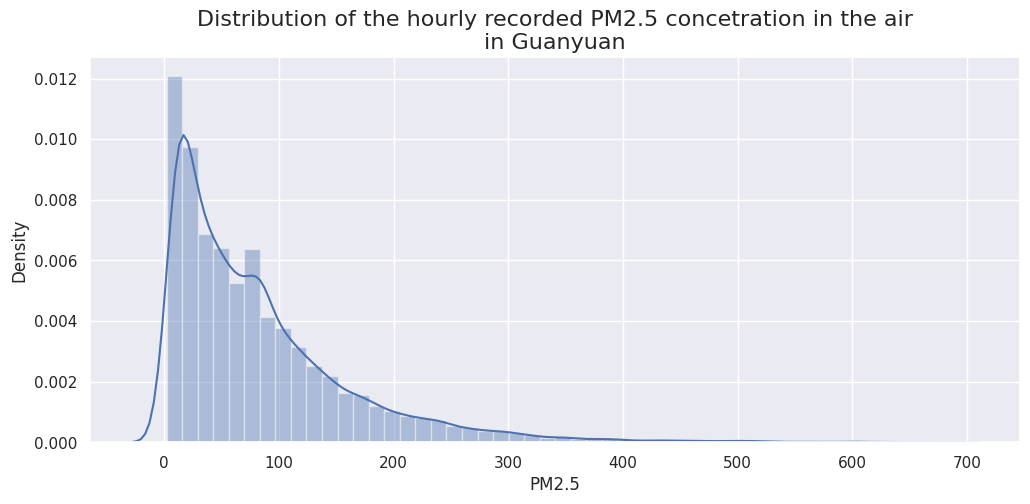

In [10]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2.5'],bins=50)
plt.title('Distribution of the hourly recorded PM2.5 concetration in the air\nin Guanyuan',
          fontsize=16)
plt.show()

### Key Observations:
1. **Skewed Distribution**:
   - The distribution is **heavily right-skewed**, indicating that most of the recorded PM2.5 concentrations are **low** but there are a few cases where concentrations are quite **high** (above 100 µg/m³).
   - This suggests that while the majority of the time the air quality is relatively good (low PM2.5), there are some instances where the pollution levels spike significantly.

2. **Concentration Range**:
   - The highest density (peak of the distribution) occurs for **PM2.5 concentrations between 0 and 50 µg/m³**, meaning that these lower values are the most common.
   - Beyond **100 µg/m³**, the frequency of higher PM2.5 concentrations declines sharply, with very few extreme outliers above **300 µg/m³**.

### Further Insights:
- The **right-skewed** nature of the data tells us that while the **average air quality is not severely polluted**, there are **episodic pollution events** where PM2.5 concentrations exceed safe limits, which could pose serious health risks during those times.
- Understanding the causes of these spikes would be critical for mitigating pollution and protecting public health.

In summary, while the air quality in Guanyuan is generally acceptable, there are sporadic events of high PM2.5 concentrations that need closer examination to prevent hazardous levels of air pollution.

### Pertanyaan 1: **What pattern does the amount of PM2.5 concentration in the air recorded in an hour follow for a daily time period ?**

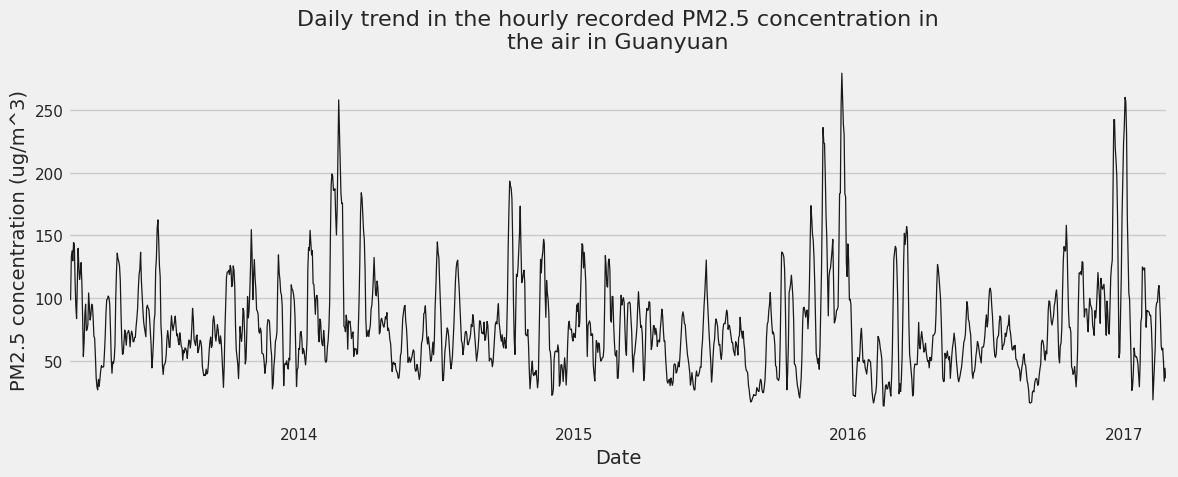

In [11]:
# find the daily average of PM2.5 contained in the air in any given hour
daily_data = data[['date','PM2.5']]
daily_data = daily_data.set_index('date')
daily_data = daily_data.resample('D').median()
decomposition = seasonal_decompose(daily_data,model='addictive')

# plot the data
with plt.style.context('fivethirtyeight'):
    decomposition.trend.plot(figsize=(12,5),style='k-',linewidth=.9,legend=False)
    plt.xlabel('Date',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Daily trend in the hourly recorded PM2.5 concentration in\nthe air in Guanyuan',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

### Insights:
1. **Fluctuations**: The concentration of PM2.5 fluctuates significantly over time. There are periods of relatively lower concentrations followed by sudden spikes, indicating periods of high pollution.
  
2. **Extreme Pollution Events**: There are multiple **sharp spikes** where PM2.5 concentration exceeds 200 µg/m³, which are likely episodes of severe air pollution. These spikes may coincide with particular events such as dust storms, heavy traffic, or industrial emissions.

3. **Periods of Lower Pollution**: There are also periods where PM2.5 concentration drops significantly below 50 µg/m³, indicating times when the air quality improves. These could correlate with cleaner seasons, lower human activity, or favorable weather conditions for dispersing pollutants.

### Pertanyaan 2: **In which month does the amount of PM2.5 contained in the air rises ?**

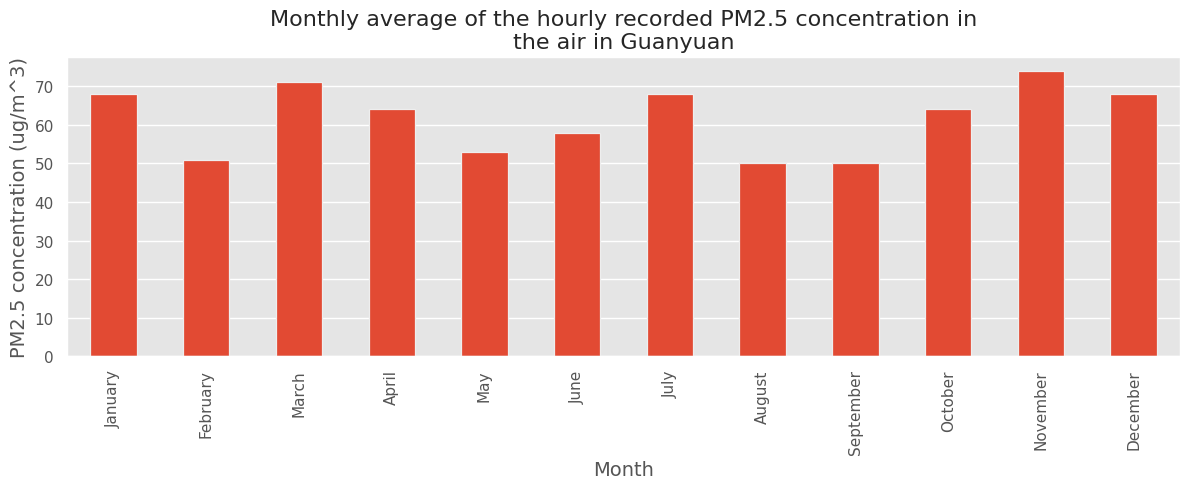

In [12]:
monthly_data = data[['month','PM2.5']]
months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']
ordered_monthdf = pd.DataFrame(months,columns=['month'])
map_dict = {}
for i,j in enumerate(months):
    map_dict.setdefault(i+1,j)

monthly_data.month = monthly_data.month.map(map_dict)
monthly_average = monthly_data.groupby('month').median()
monthly_average = pd.merge(ordered_monthdf,monthly_average,left_on='month',right_index=True)
monthly_average = np.round(monthly_average,1)
monthly_average = monthly_average.set_index('month')

# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Guanyuan',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

**Insight**

November is the month with the highest average PM2.5 concentration and August and September are the months with the lowest average PM2.5 concentration.

### Pertanyaan 3: **At what time of the day do we expect the amount of PM2.5 concentration in the air to be high ?**

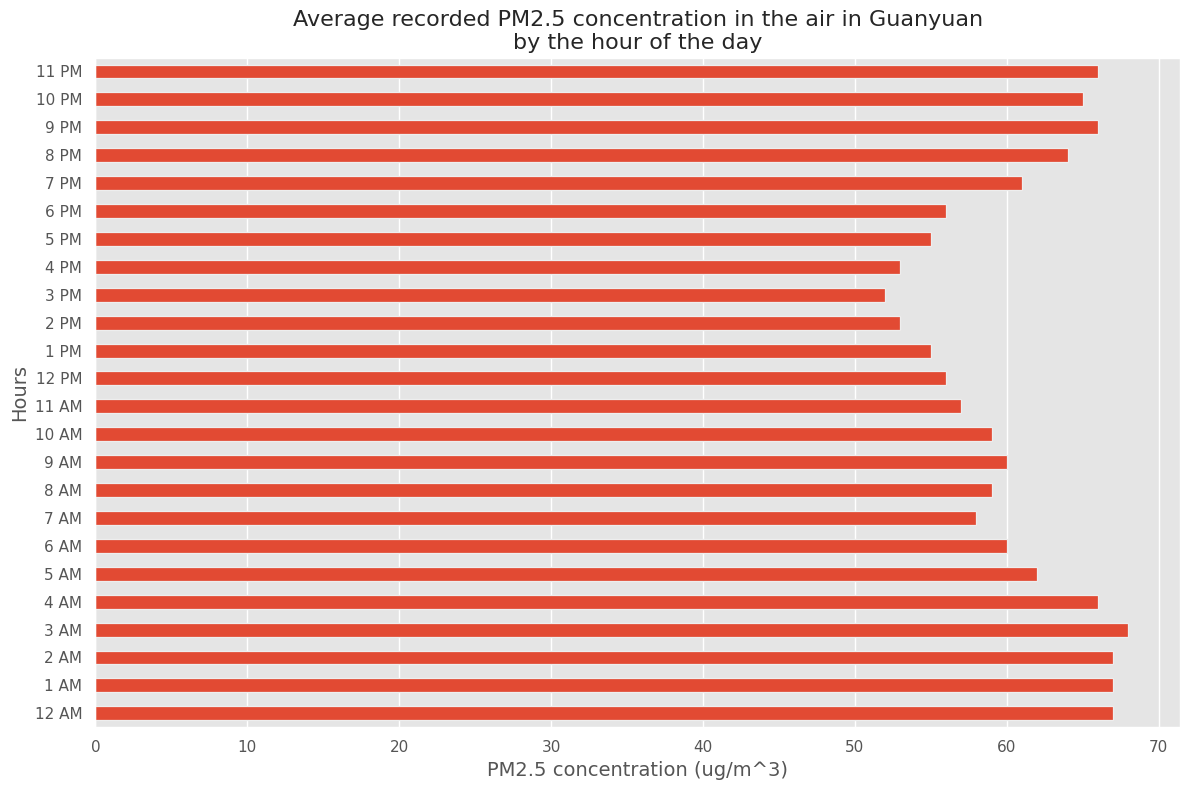

In [13]:
hourly_data = data[['hour','PM2.5']]
hrs = ['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM','7 AM','8 AM','9 AM','10 AM',
      '11 AM','12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM','7 PM',
      '8 PM','9 PM','10 PM','11 PM']
hour_dict = {}
for i,j in enumerate(hrs):
    hour_dict.setdefault(i,j)

hourly_data = hourly_data.groupby('hour').median().reset_index()
hourly_data.hour = hourly_data.hour.map(hour_dict)
hourly_data = hourly_data.set_index('hour')

# plot the data
with plt.style.context('ggplot'):
    hourly_data.plot(figsize=(12,8),legend=False,kind='barh',linewidth=.9)
    plt.ylabel('Hours',fontsize=14)
    plt.xlabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average recorded PM2.5 concentration in the air in Guanyuan\nby the hour of the day',fontsize=16)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

### Insight

1. **Highest PM2.5 Concentrations**:
   - The highest PM2.5 concentrations are recorded during the **late evening and night**, peaking between **9 PM and 11 PM**.
   - This could indicate that air quality tends to worsen later in the day, potentially due to factors like increased emissions from evening activities, traffic, or reduced wind dispersion at night.

2. **Lowest PM2.5 Concentrations**:
   - The lowest PM2.5 concentrations are observed during the **afternoon hours**, particularly around **3 PM to 6 PM**.
   - This may suggest that during the afternoon, factors such as sunlight, higher temperatures, and greater air circulation contribute to better air quality, reducing PM2.5 levels.

3. **Consistent Early Morning Levels**:
   - PM2.5 levels remain relatively stable from **12 AM to 5 AM**, indicating that air quality overnight into the early morning doesn’t fluctuate much until it starts to drop mid-morning.

4. **Day-Night Variations**:
   - The pattern suggests a **day-night cycle** where PM2.5 levels gradually decrease in the early hours and afternoon, and then rise again in the evening and night. This cyclical behavior could be due to daily human activities such as transportation, industrial emissions, and changes in meteorological conditions.

### Pertanyaan 4: **In which direction does polluted air/wind mostly move ?**

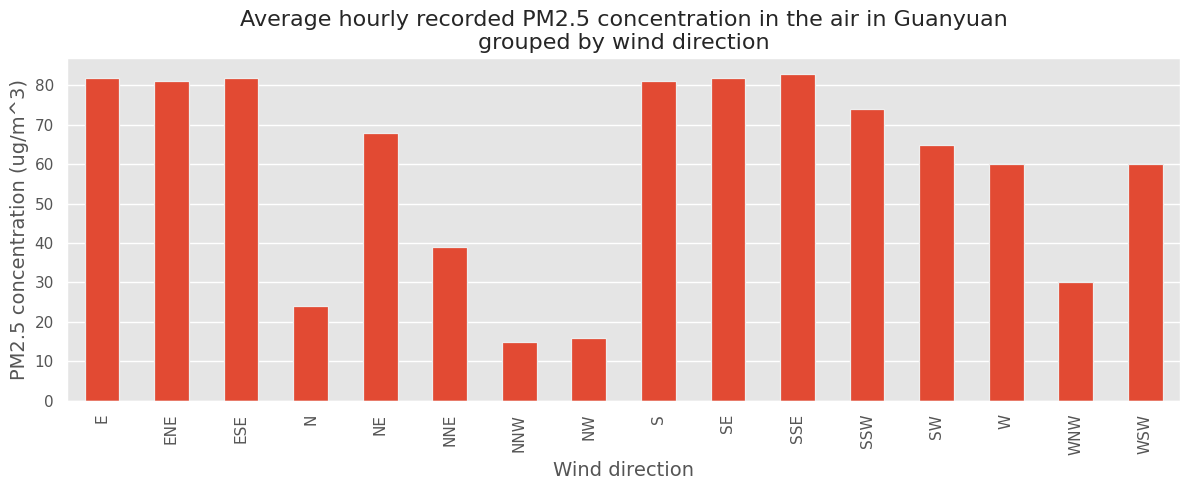

In [14]:
wind_dir = data[['wd','PM2.5']]
wind_dir = wind_dir.groupby('wd').median()

# plot the data
with plt.style.context('ggplot'):
    wind_dir.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Wind direction',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Average hourly recorded PM2.5 concentration in the air in Guanyuan\ngrouped by wind direction',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

**Insights**

1. **Highest PM2.5 Concentrations**: Wind directions from the **E (East)**, **ENE (East-Northeast)**, and **ESE (East-Southeast)** show the highest concentrations of **PM2.5**, with values around 80 µg/m³. This indicates that when the wind is coming from the eastern directions, the air quality tends to worsen with higher levels of fine particulate matter.

2. **Other High Concentrations**: Wind from the **S (South)**, **SE (Southeast)**, and **SSE (South-Southeast)** also shows similarly high PM2.5 concentrations, suggesting that air quality is poorer when winds blow from the southern directions.

3. **Lowest PM2.5 Concentrations**: The lowest PM2.5 levels are associated with winds from the **NNW (North-Northwest)**, **NW (Northwest)**, and **N (North)**, with concentrations around or below 25 µg/m³. Winds from these directions seem to coincide with better air quality.

4. **Moderate PM2.5 Levels**: Wind directions from the **W (West)**, **SW (Southwest)**, and **SSW (South-Southwest)** show moderate PM2.5 concentrations, ranging between 75 and 60 µg/m³.

### Key Takeaway:
The PM2.5 concentration in Guanyuan appears to be strongly influenced by wind direction, with winds from the eastern and southern directions being associated with the highest levels of air pollution, while winds from the northwest and north tend to bring cleaner air. This pattern could be tied to regional pollution sources or atmospheric conditions affecting how particulate matter moves and settles in the area.

### Pertanyaan 5: **How do the other environmental factors affect the amount of PM2.5 concentration in the air ?**

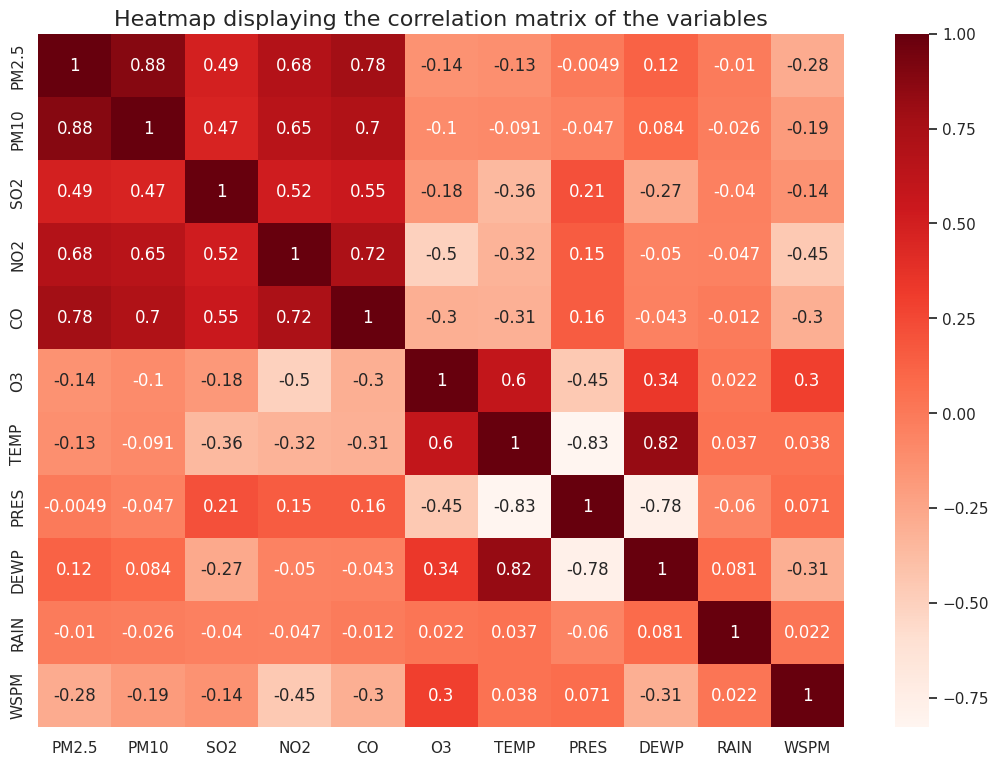

In [15]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'TEMP', 'PRES',
                         'DEWP', 'RAIN', 'WSPM']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

Here's how each variable influences PM2.5 based on the correlation matrix:

1. **PM10**:
   - The **strongest positive correlation** (0.88) with PM2.5 shows that **PM10** and PM2.5 tend to rise together. This is expected because both are particulate matter, with PM2.5 being a subset of PM10, meaning that sources contributing to PM10 emissions likely also affect PM2.5 concentrations.

2. **Carbon Monoxide (CO)**:
   - CO has a **strong positive correlation** (0.78) with PM2.5. This suggests that when **CO levels increase**, likely from combustion-related activities (such as vehicle emissions or industrial processes), **PM2.5 levels also rise**. Both pollutants share common sources like traffic and burning of fossil fuels.

3. **Nitrogen Dioxide (NO2)**:
   - NO2 is **positively correlated** (0.68) with PM2.5, indicating that increased **NO2 levels**—another byproduct of combustion—often coincide with increased PM2.5. This relationship points to common sources, such as vehicle emissions, industrial activities, and fossil fuel combustion.

4. **Sulfur Dioxide (SO2)**:
   - SO2 shows a **moderate positive correlation** (0.49) with PM2.5, implying that higher **SO2 concentrations** from activities like coal burning or industrial emissions can also elevate PM2.5 concentrations. However, this correlation is weaker than with other gases like CO and NO2.

5. **Ozone (O3)**:
   - O3 has a **weak negative correlation** (-0.14) with PM2.5, meaning that when **ozone levels rise**, **PM2.5 tends to decrease** slightly. This may be due to the different atmospheric processes that govern ozone and particulate matter. Ozone formation typically occurs in sunny conditions, which may disperse particulate matter.

6. **Temperature (TEMP)**:
   - There is a **slight negative correlation** (-0.13) between temperature and PM2.5. Higher temperatures may reduce **PM2.5 levels**, as warmer weather often improves air circulation and dispersal of pollutants. Additionally, certain sources of PM2.5, like heating, decrease in warmer weather.

7. **Pressure (PRES)**:
   - PM2.5 has a **very weak correlation** with pressure (-0.0049). This suggests that **air pressure** does not have a significant direct effect on PM2.5 concentrations, though indirect factors, such as weather patterns associated with high- or low-pressure systems, might play a role.

8. **Dew Point (DEWP)**:
   - **Dew point** shows a **positive but weak correlation** (0.12) with PM2.5, suggesting that **more humid conditions** might slightly increase particulate matter levels. High humidity can contribute to particle growth, as moisture can cause smaller particles to aggregate.

9. **Rainfall (RAIN)**:
   - **Rain** has a **very weak negative correlation** (-0.01) with PM2.5. This likely indicates that **rain helps to wash particulate matter out of the air**, although the effect seems minimal in this dataset.

10. **Wind Speed (WSPM)**:
    - Wind speed has a **negative correlation** (-0.28) with PM2.5. This means that **stronger winds help to disperse pollutants**, leading to lower PM2.5 concentrations. Wind plays a crucial role in diluting and spreading out pollution.

### Summary:
- Pollutants like **PM10**, **CO**, and **NO2** have the **strongest positive correlations** with PM2.5, indicating shared sources and the likelihood of simultaneous increases in concentration.
- **Wind speed** and **temperature** generally help reduce PM2.5 concentrations, while **rain** has a marginal effect.
- **Ozone** behaves differently from particulate pollutants and tends to **increase** when PM2.5 decreases slightly.

These interactions highlight the complexity of air quality dynamics and how both meteorological conditions and other pollutants influence PM2.5 levels.

## Conclusion

1. **Fluctuations in PM2.5 Concentration**:
  - The PM2.5 concentration in Guanyuan fluctuates significantly over time, showing periods of lower pollution followed by sharp spikes. These spikes often represent extreme pollution events, where PM2.5 concentration exceeds 200 µg/m³, likely due to specific environmental factors such as industrial emissions or dust storms.

2. **Temporal Patterns**:
   - The highest PM2.5 concentrations are recorded during the **late evening and night**, peaking between **9 PM and 11 PM**, possibly due to increased human activities such as traffic and reduced wind dispersion at night.
   - In contrast, the lowest concentrations occur in the **afternoon (3 PM - 6 PM)**, likely due to better air circulation and dispersal of pollutants during the day.
   - Early morning (12 AM - 5 AM) sees relatively stable PM2.5 levels, indicating minimal fluctuations during these hours.

3. **Monthly Variations**:
   - **November** experiences the highest average PM2.5 concentrations, potentially linked to seasonal factors like winter heating.
   - **August and September** show the lowest concentrations, possibly due to cleaner air and favorable weather conditions during these months.

4. **Wind Influence**:
   - Winds from the **eastern** and **southern** directions bring higher PM2.5 concentrations, suggesting pollution sources from these areas.
   - Conversely, winds from the **northwest** and **north** tend to bring cleaner air, lowering PM2.5 levels.

5. **Correlation with Other Pollutants and Meteorological Factors**:
   - **PM10**, **CO**, and **NO2** show strong positive correlations with PM2.5, indicating common sources like combustion-related activities.
   - **Wind speed** and **temperature** are negatively correlated with PM2.5, helping to disperse pollutants and reduce concentrations.
   - **Rain** has a marginal effect in reducing PM2.5 levels, while **ozone** tends to slightly increase when PM2.5 decreases.

### Final Insight:
While daily human activities and meteorological conditions play a significant role in influencing PM2.5 concentrations, certain times of the day (late evening) and particular months (November) present higher risks for air pollution. Furthermore, wind direction significantly impacts the air quality, with specific regions contributing more to pollution in Guanyuan.